# 1. Baseball Case Study Problem Statement:


This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

For downloading the dataset, use the link given below. 

# 2. Import Liabrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.Import Dataset

In [2]:
data=pd.read_csv("baseball.csv")

In [3]:
data.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

# 4. Summarize the Dataset

**Mention below are the description of dataset feature's columns**

W -Wins

R -Runs Scored

AB-At Bats

H-Hits by batter

2B-Doubles

3B-Triples

HR-Homeruns by batter

BB-Walks

SO-Strikeouts by batter

SB-Stolen bases

RA-Opponents runs scored

ER-Earned runs allowed

ERA-Earned run average

CG-Complete games

SHO-Shutouts

SV-Saves

E-Errors

## 4.1 Shape of Dataset

In [4]:
data.shape

(30, 17)

**Dataset having only 30 observation and 17 features columns including target variable.So the dataset having very less observation and features are more.**

## 4.2 Statistical Summary

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


**Below are the observation**
1. there are 16 columns which data type is int64, and 1 columns which data type is float 64.
2. There are 16 features columns and W is the target variable.
3. There is no categorical columns in dataset

In [6]:
data.describe().transpose()

count         mean         std      min        25%       50%      75%  \
W     30.0    80.966667   10.453455    63.00    74.0000    81.000    87.75   
R     30.0   688.233333   58.761754   573.00   651.2500   689.000   718.25   
AB    30.0  5516.266667   70.467372  5385.00  5464.0000  5510.000  5570.00   
H     30.0  1403.533333   57.140923  1324.00  1363.0000  1382.500  1451.50   
2B    30.0   274.733333   18.095405   236.00   262.2500   275.500   288.75   
3B    30.0    31.300000   10.452355    13.00    23.0000    31.000    39.00   
HR    30.0   163.633333   31.823309   100.00   140.2500   158.500   177.00   
BB    30.0   469.100000   57.053725   375.00   428.2500   473.000   501.25   
SO    30.0  1248.200000  103.759470   973.00  1157.5000  1261.500  1311.50   
SB    30.0    83.500000   22.815225    44.00    69.0000    83.500    96.50   
RA    30.0   688.233333   72.108005   525.00   636.2500   695.500   732.50   
ER    30.0   635.833333   70.140786   478.00   587.2500   644.500   679.25   
ERA   30.0     3.956333    0.454089     2.94     3.6825     4.025     4.22   
CG    30.0     3.466667    2.763473     0.00     1.0000     3.000     5.75   
SHO   30.0    11.300000    4.120177     4.00     9.0000    12.000    13.00   
SV    30.0    43.066667    7.869335    28.00    37.2500    42.000    46.75   
E     30.0    94.333333   13.958889    75.00    86.0000    91.000    96.75   

         max  
W     100.00  
R     891.00  
AB   5649.00  
H    1515.00  
2B    308.00  
3B     49.00  
HR    232.00  
BB    570.00  
SO   1518.00  
SB    134.00  
RA    844.00  
ER    799.00  
ERA     5.04  
CG     11.00  
SHO    21.00  
SV     62.00  
E     126.00

**Below are the observation**
1. There are no null values in dataset.
2. The mean and the median of the featurs columns are almost same,means data would be normally distributed.
3. There are minimum value of zero in "CG" feature.


In [7]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

**Confirming back there is no null value in dataset.**

In [8]:
data.duplicated().sum()

0

**To confirm the duplcation of observation**

# 5.Univariate Analysis

### Visualising W (Win) target variable

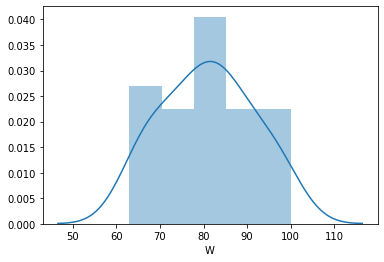

In [9]:
sns.distplot(data["W"])

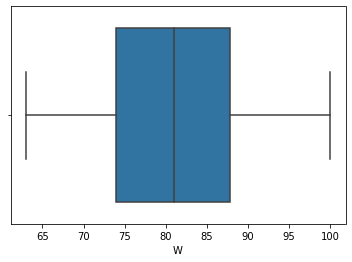

In [10]:
sns.boxplot(data["W"])

**We can interpret our target variable is uniform distribution and no outliers**

### Visualising R (Runs) target variable

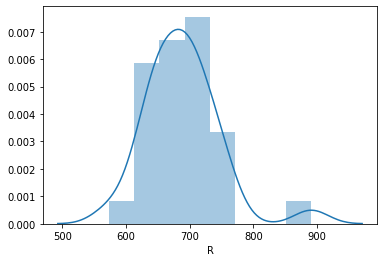

In [11]:
sns.distplot(data["R"])

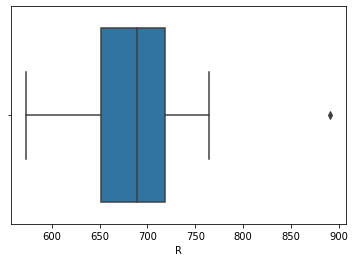

In [12]:
sns.boxplot(data["R"])

**We can interpret Runs features is almost unifrom distribution but having some outliers**

### Visualising AB (At Bats) target variable

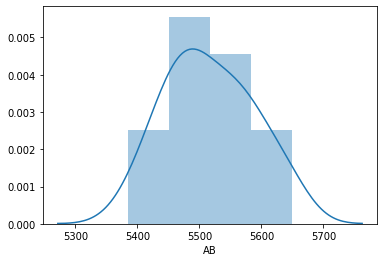

In [13]:
sns.distplot(data["AB"])

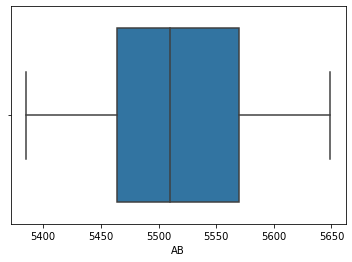

In [14]:
sns.boxplot(data["AB"])

**We can interpret our target variable is uniform distribution and no outliers**

### Visualising H (Hits by batter) target variable

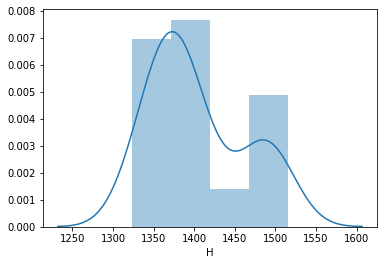

In [15]:
sns.distplot(data["H"])

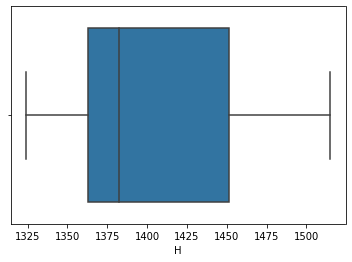

In [16]:
sns.boxplot(data["H"])

**We can interpret our Hit by batter(H) features are not exactly distributed uniformly, the median is 1378 where mean is 1403**

### Visualising 2B (Doubles) target variable

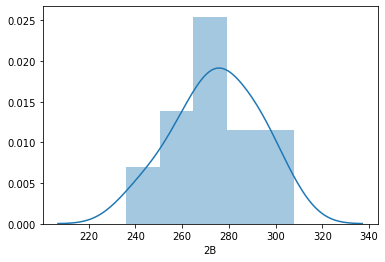

In [17]:
sns.distplot(data["2B"])

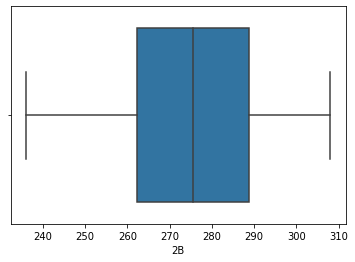

In [18]:
sns.boxplot(data["2B"])

**We can interpret 2B feature is uniform distribution and no outliers**

### Visualising 3B (Triple) target variable

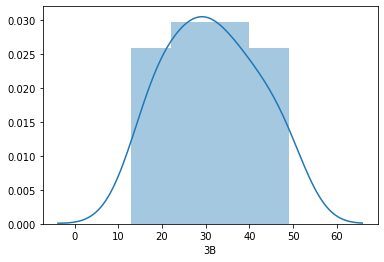

In [19]:
sns.distplot(data["3B"])

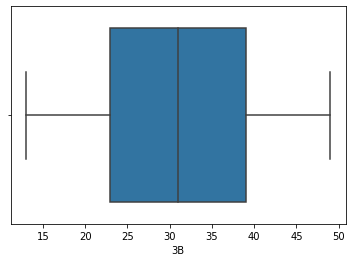

In [20]:
sns.boxplot(data["3B"])

**We can interpret 3B feature is uniform distribution and no outliers**

### Visualising HR (Homeruns by batter) target variable

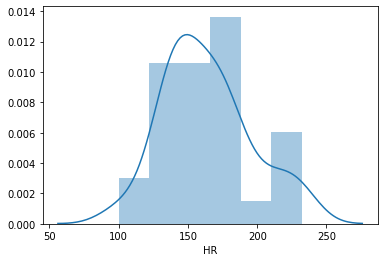

In [21]:
sns.distplot(data["HR"])

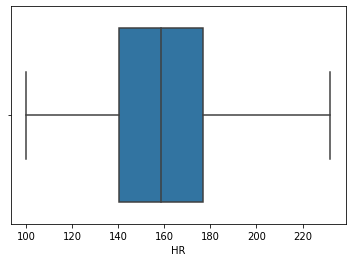

In [22]:
sns.boxplot(data["HR"])

**We can interpret HR feature is uniform distribution and no outliers**

### Visualising BB (Walks) target variable

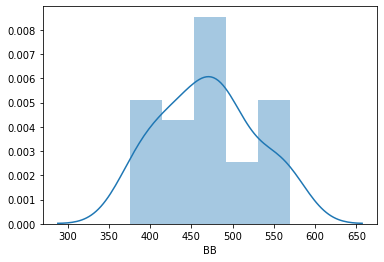

In [23]:
sns.distplot(data["BB"])

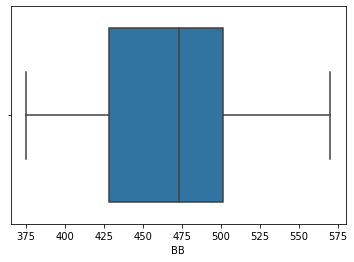

In [24]:
sns.boxplot(data["BB"])

**We can interpret BB feature is uniform distribution and no outliers**

### Visualising SO (Strikeouts by batter) target variable

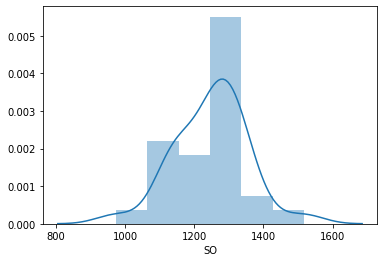

In [25]:
sns.distplot(data["SO"])

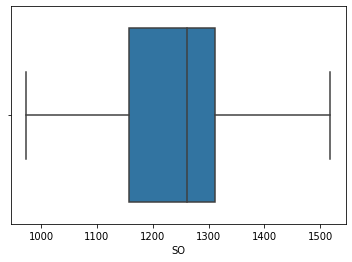

In [26]:
sns.boxplot(data["SO"])

**We can interpret SO (Strikeouts by batter)  feature is uniform distribution and no outliers**

### Visualising SB (Stolen bases) target variable

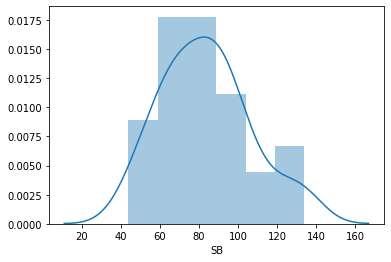

In [27]:
sns.distplot(data["SB"])

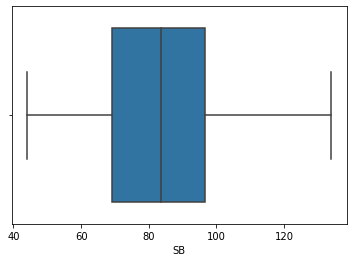

In [28]:
sns.boxplot(data["SB"])

**We can interpret SB (Strikeouts by batter)  feature is uniform distribution and no outliers**

### Visualising RA (Opponents runs scored) target variable

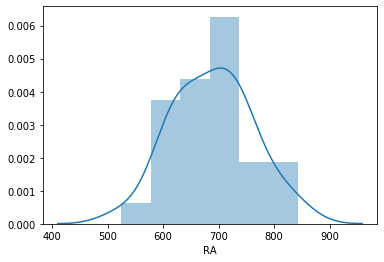

In [29]:
sns.distplot(data["RA"])

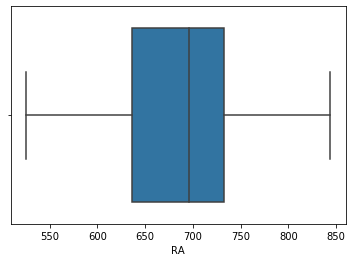

In [30]:
sns.boxplot(data["RA"])

**We can interpret RA (Opponents runs scored)  feature is uniform distribution and no outliers**

### Visualising ER (Earned runs allowed) target variable

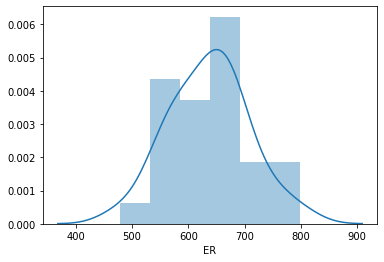

In [31]:
sns.distplot(data["ER"])

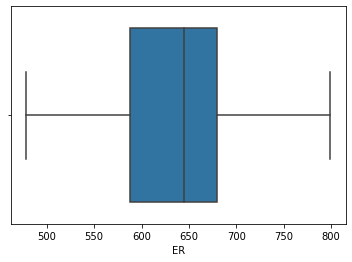

In [32]:
sns.boxplot(data["ER"])

**We can interpret ER (Earned runs allowed)  feature is uniform distribution and no outliers**

### Visualising ERA (Earned runs allowed) target variable

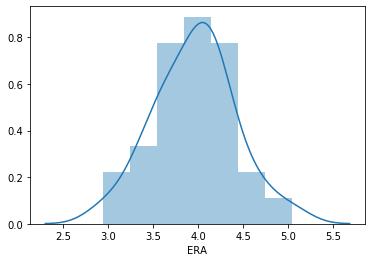

In [33]:
sns.distplot(data["ERA"])

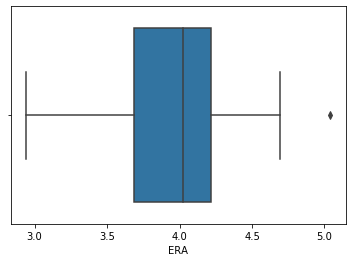

In [34]:
sns.boxplot(data["ERA"])

**We can interpret ERA (Earned runs allowed) features is almost unifrom distribution but having some outliers**

### Visualising CG (Complete games) target variable

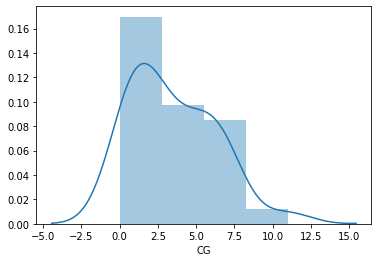

In [35]:
sns.distplot(data["CG"])

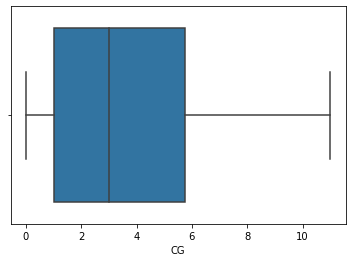

In [36]:
sns.boxplot(data["CG"])

**We can interpret that CG (complete games) features are right skewed.**

### Visualising SHO (Shutouts) target variable

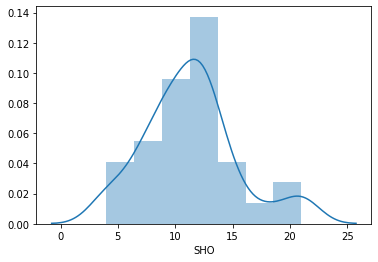

In [37]:
sns.distplot(data["SHO"])

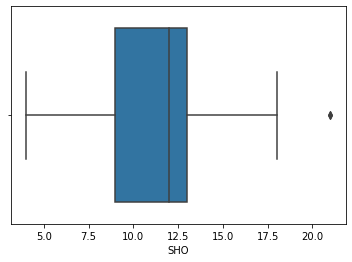

In [38]:
sns.boxplot(data["SHO"])

**We can interpret SHO (Shutouts) features is almost unifrom distribution but having some outliers**

### Visualising E (Errors) target variable

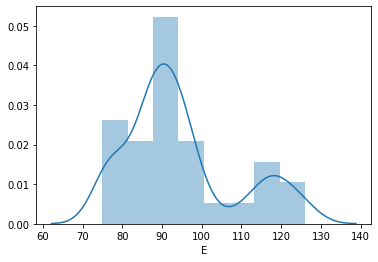

In [39]:
sns.distplot(data["E"])

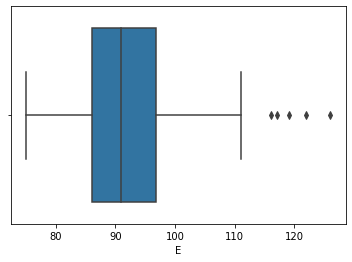

In [40]:
sns.boxplot(data["E"])

**We can interpret E (Error) features having outliers**

# 6.Bivariate Analysis

In [41]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Relationship between Wins and Runs

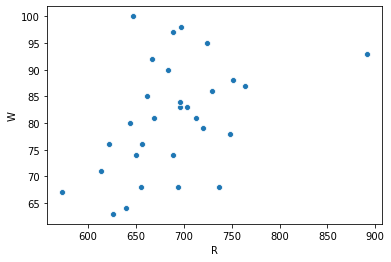

In [42]:
sns.scatterplot(x="R",y="W",data=data)

**There is linear regression between wins and runs.**

### Relationship between Wins and At Bats(AB)

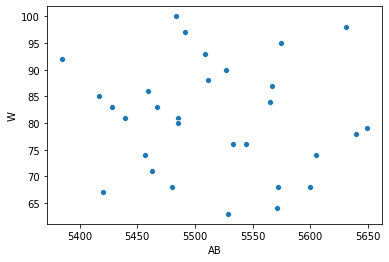

In [43]:
sns.scatterplot(x="AB",y="W",data=data)

**There is non-linear relationship between Wins and At Bats.**

### Relationship between Wins and H (hits by batter)

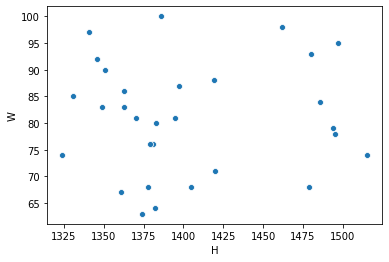

In [44]:
sns.scatterplot(x="H",y="W",data=data)

**There is non-linear relationship between Wins and Hits by batter.**

### Relationship between Wins and 2B (Doubles)

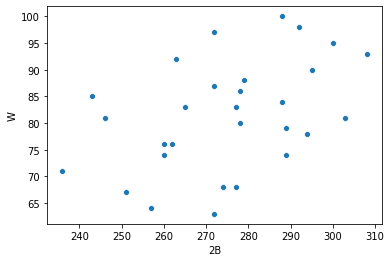

In [45]:
sns.scatterplot(x="2B",y="W",data=data)

**There is non-linear relationship between Wins and doubles by batter.**

### Relationship between Wins and 3B (Doubles)

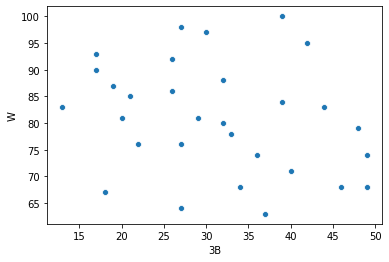

In [46]:
sns.scatterplot(x="3B",y="W",data=data)

**There is non-linear relationship between Wins and Triples by batter.**

### Relationship between Wins and HR (Homeruns by batter)

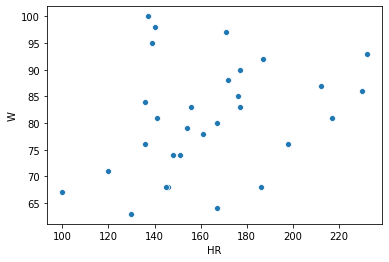

In [47]:
sns.scatterplot(x="HR",y="W",data=data)

**There is non-linear relationship between Wins and Homeruns by batter.**

### Relationship between Wins and BB (Walks)

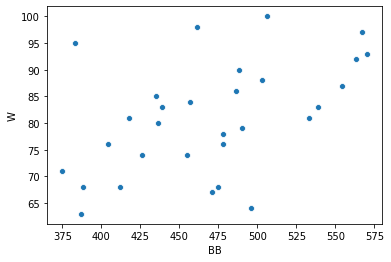

In [48]:
sns.scatterplot(x="BB",y="W",data=data)

**There is non-linear relationship between Wins and Homeruns by batter.**

### Relationship between Wins and SO (Strikeouts by batter)

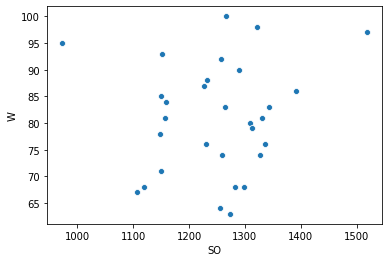

In [49]:
sns.scatterplot(x="SO",y="W",data=data)

**There is non-linear relationship between Wins and Strikeouts by batter.**

### Relationship between Wins and SB (Stolen bases)

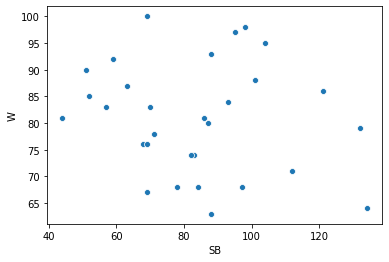

In [50]:
sns.scatterplot(x="SB",y="W",data=data)

**There is non-linear relationship between Wins and Stolen bases.**

### Relationship between Wins and RA (Opponents runs scored)

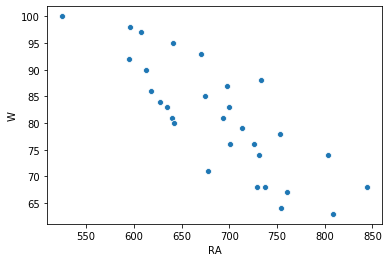

In [51]:
sns.scatterplot(x="RA",y="W",data=data)

**There is Negative linear relationship between Wins and Opponents runs scored.**

### Relationship between Wins and ERA (Earned run average)

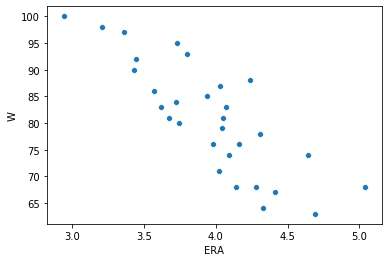

In [52]:
sns.scatterplot(x="ERA",y="W",data=data)

**There is Negative linear relationship between Wins and Earned run average.**

### Relationship between Wins and CG (Complete Games)

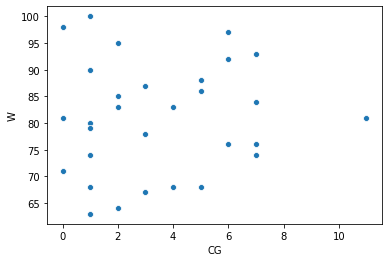

In [53]:
sns.scatterplot(x="CG",y="W",data=data)

**There is non-linear relationship between Wins and Stolen bases.**

### Relationship between Wins and SHO (Shutouts)

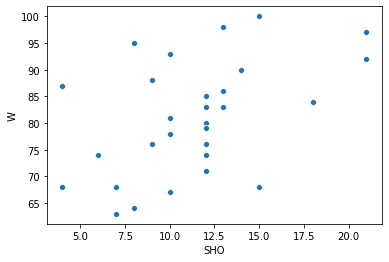

In [54]:
sns.scatterplot(x="SHO",y="W",data=data)

**There is non-linear relationship between Wins and Shutouts.**

### Relationship between Wins and SV (Saves)

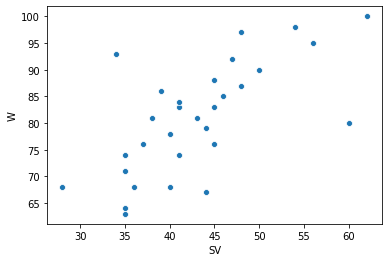

In [55]:
sns.scatterplot(x="SV",y="W",data=data)

**There is linear relationship between Wins and Saves.**

### Relationship between Wins and E(Error)

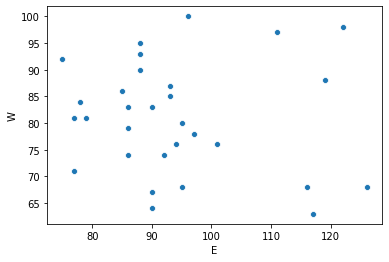

In [56]:
sns.scatterplot(x="E",y="W",data=data)

**There is non-linear relationship between Wins and Error.**

# 7.Multivariate Analysis

In [57]:
data.corr()

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
RA  -0.812952 -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903   
ER  -0.809435 -0.041245  0.309686  0.252489 -0.235531  0.340225 -0.085922   
ERA -0.819600 -0.049281  0.255551  0.231172 -0.254854  0.330951 -0.090917   
CG   0.080533  0.232042 -0.080876  0.147955  0.306675 -0.065898  0.156502   
SHO  0.471805 -0.103274 -0.197321 -0.145559  0.057998 -0.041396 -0.019119   
SV   0.666530 -0.096380 -0.106367 -0.130371  0.171576 -0.142370 -0.028540   
E   -0.089485 -0.023262  0.316743 -0.033173  0.105754  0.126678 -0.207597   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.484342  0.111850 -0.157234 -0.812952 -0.809435 -0.819600  0.080533   
R    0.402452 -0.054726  0.081367 -0.041623 -0.041245 -0.049281  0.232042   
AB  -0.136414 -0.106022  0.372618  0.316010  0.309686  0.255551 -0.080876   
H   -0.118281 -0.398830  0.413444  0.224324  0.252489  0.231172  0.147955   
2B   0.302700 -0.150752  0.195027 -0.218160 -0.235531 -0.254854  0.306675   
3B  -0.454949 -0.141196  0.457437  0.314125  0.340225  0.330951 -0.065898   
HR   0.425691  0.359923 -0.136567 -0.103903 -0.085922 -0.090917  0.156502   
BB   1.000000  0.233652 -0.098347 -0.416445 -0.452663 -0.459832  0.462478   
SO   0.233652  1.000000  0.030968 -0.129745 -0.161612 -0.180368 -0.093418   
SB  -0.098347  0.030968  1.000000  0.132290  0.143068  0.126063 -0.020783   
RA  -0.416445 -0.129745  0.132290  1.000000  0.991018  0.986674 -0.016659   
ER  -0.452663 -0.161612  0.143068  0.991018  1.000000  0.997248 -0.020221   
ERA -0.459832 -0.180368  0.126063  0.986674  0.997248  1.000000 -0.009856   
CG   0.462478 -0.093418 -0.020783 -0.016659 -0.020221 -0.009856  1.000000   
SHO  0.426004  0.237721 -0.106563 -0.636862 -0.630192 -0.630833  0.241676   
SV   0.099445  0.126297 -0.183418 -0.616224 -0.589663 -0.607005 -0.367766   
E   -0.075685  0.155133  0.079149  0.198996  0.136921  0.113137 -0.140047   

          SHO        SV         E  
W    0.471805  0.666530 -0.089485  
R   -0.103274 -0.096380 -0.023262  
AB  -0.197321 -0.106367  0.316743  
H   -0.145559 -0.130371 -0.033173  
2B   0.057998  0.171576  0.105754  
3B  -0.041396 -0.142370  0.126678  
HR  -0.019119 -0.028540 -0.207597  
BB   0.426004  0.099445 -0.075685  
SO   0.237721  0.126297  0.155133  
SB  -0.106563 -0.183418  0.079149  
RA  -0.636862 -0.616224  0.198996  
ER  -0.630192 -0.589663  0.136921  
ERA -0.630833 -0.607005  0.113137  
CG   0.241676 -0.367766 -0.140047  
SHO  1.000000  0.221639 -0.115716  
SV   0.221639  1.000000 -0.025636  
E   -0.115716 -0.025636  1.000000

In [58]:
plt.figure(figsize=(30,30),dpi=350)
sns.set(font_scale=2.0)
sns.heatmap(data.corr(),annot=True)

**We can interpret that high correlation between ER and RA,ERA and RA,ERA and RA,H & AB.**

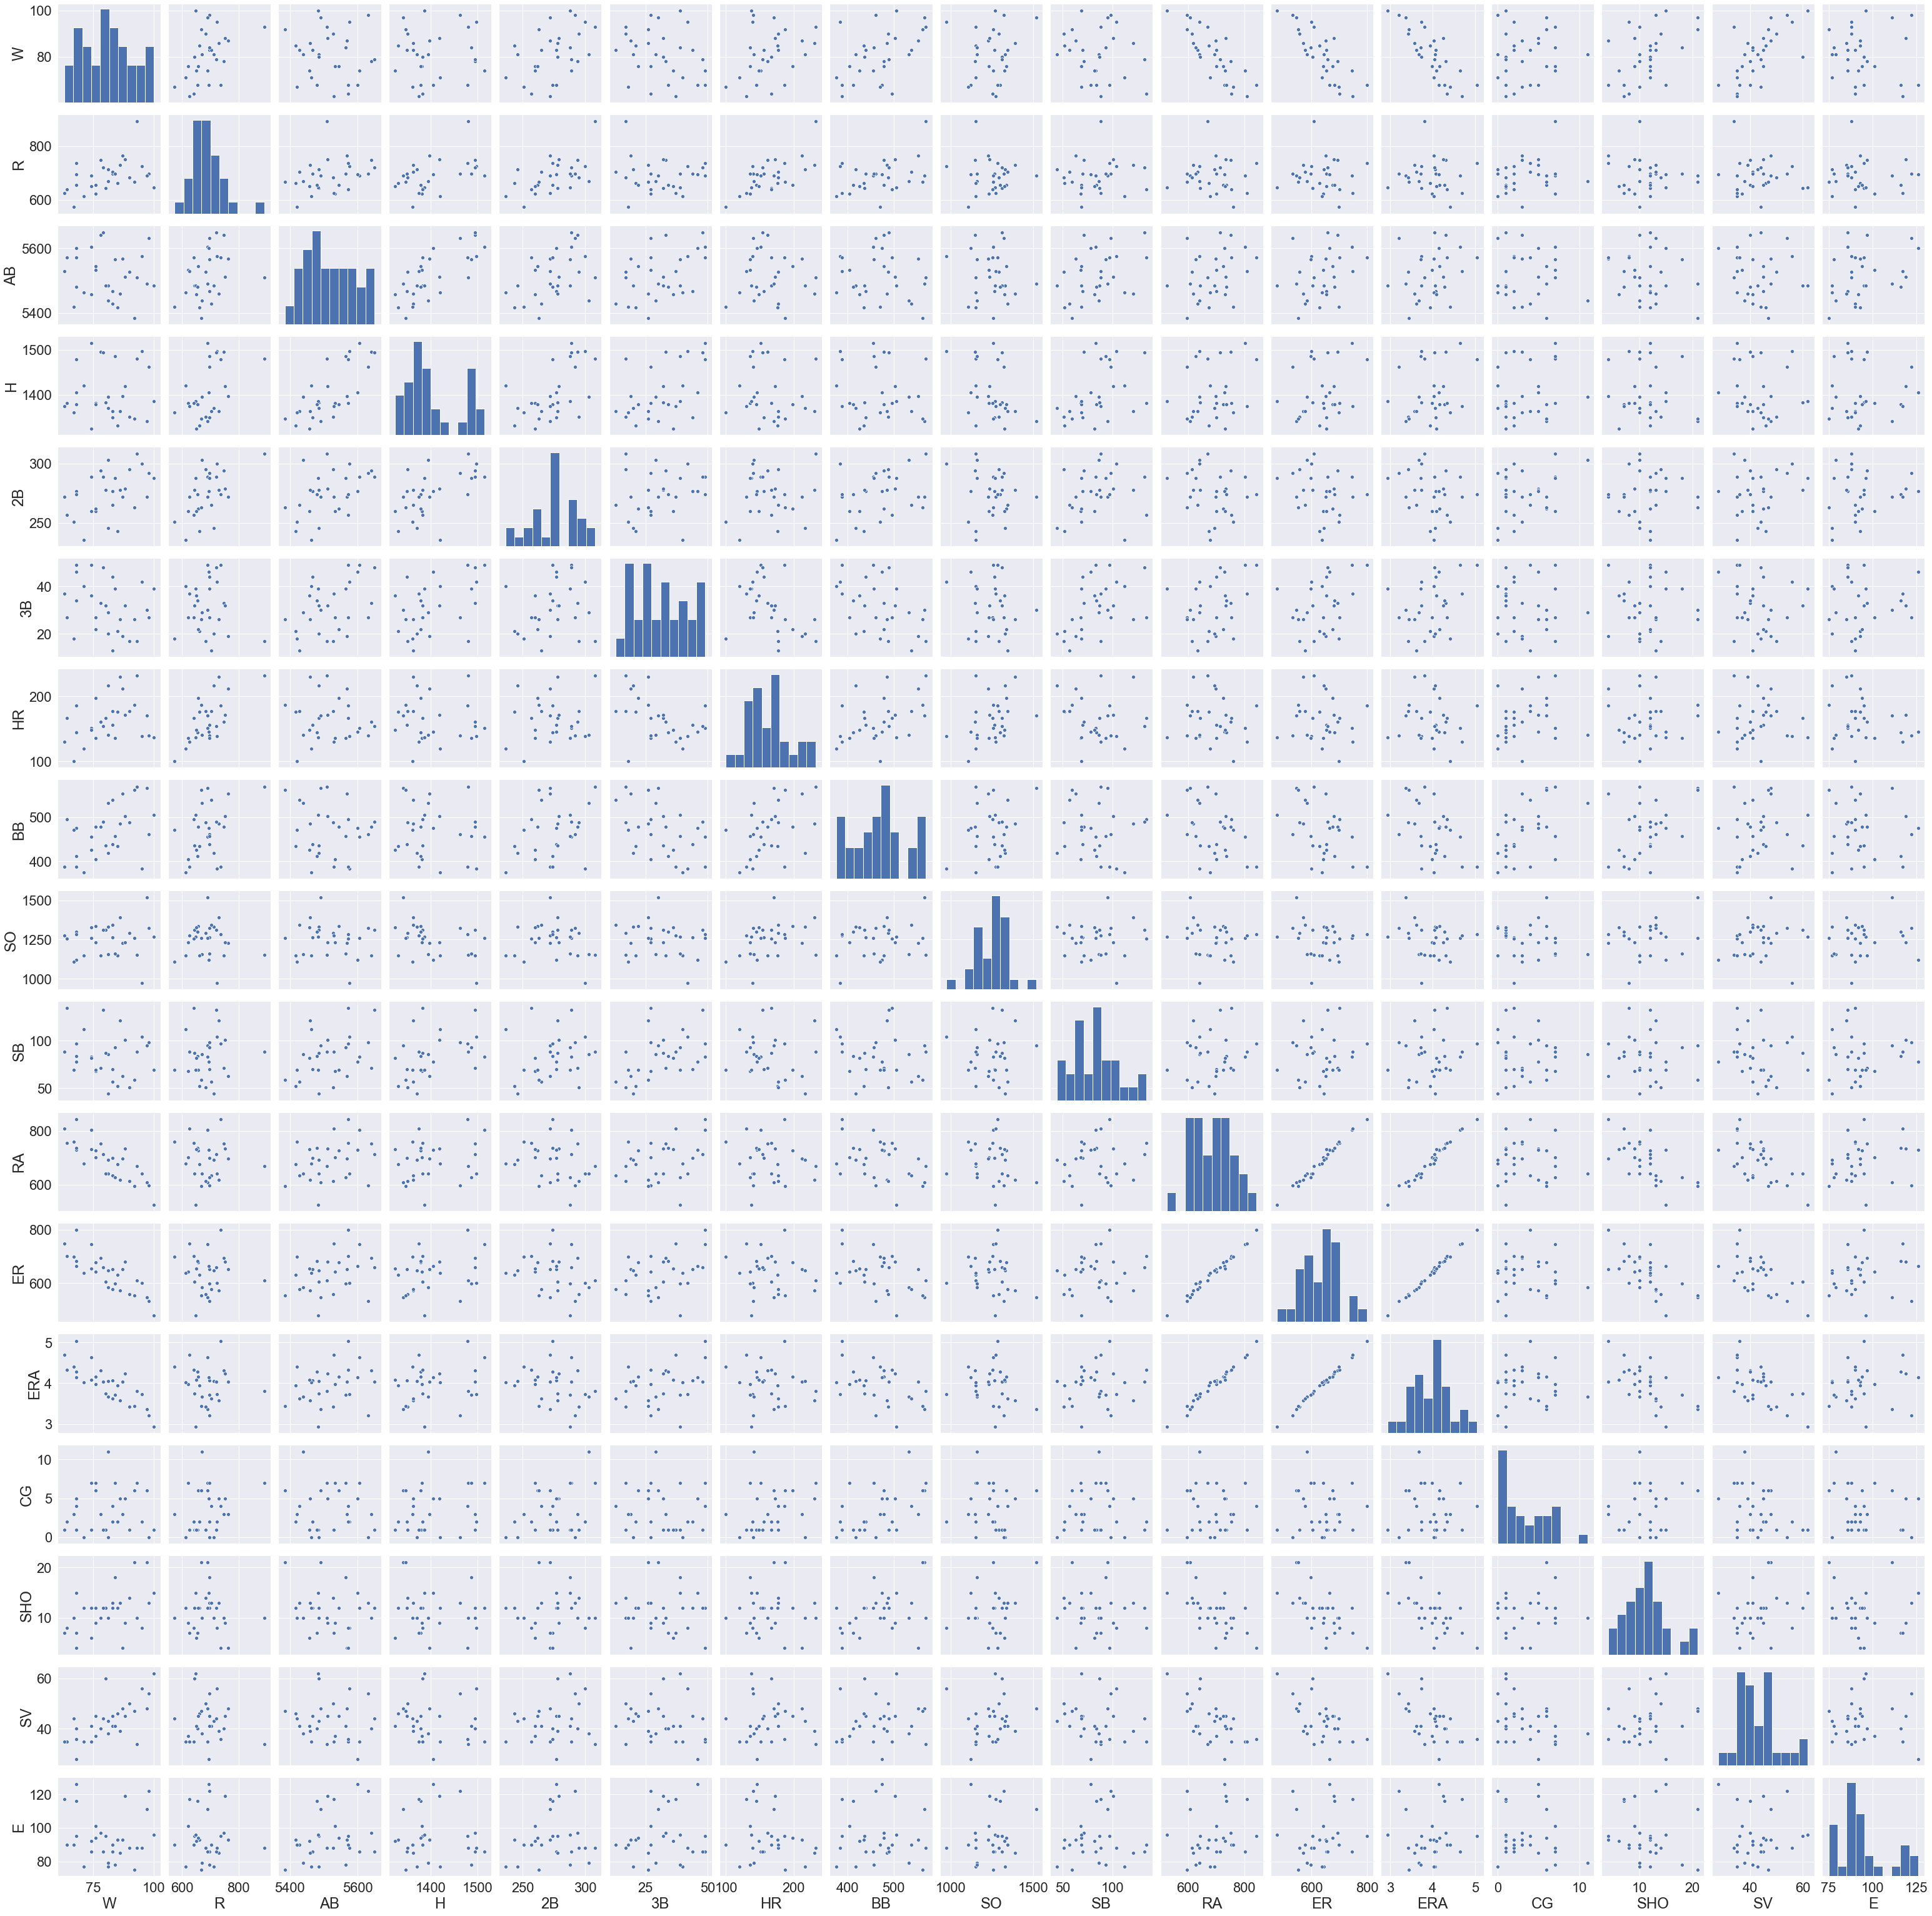

In [59]:
sns.pairplot(data)

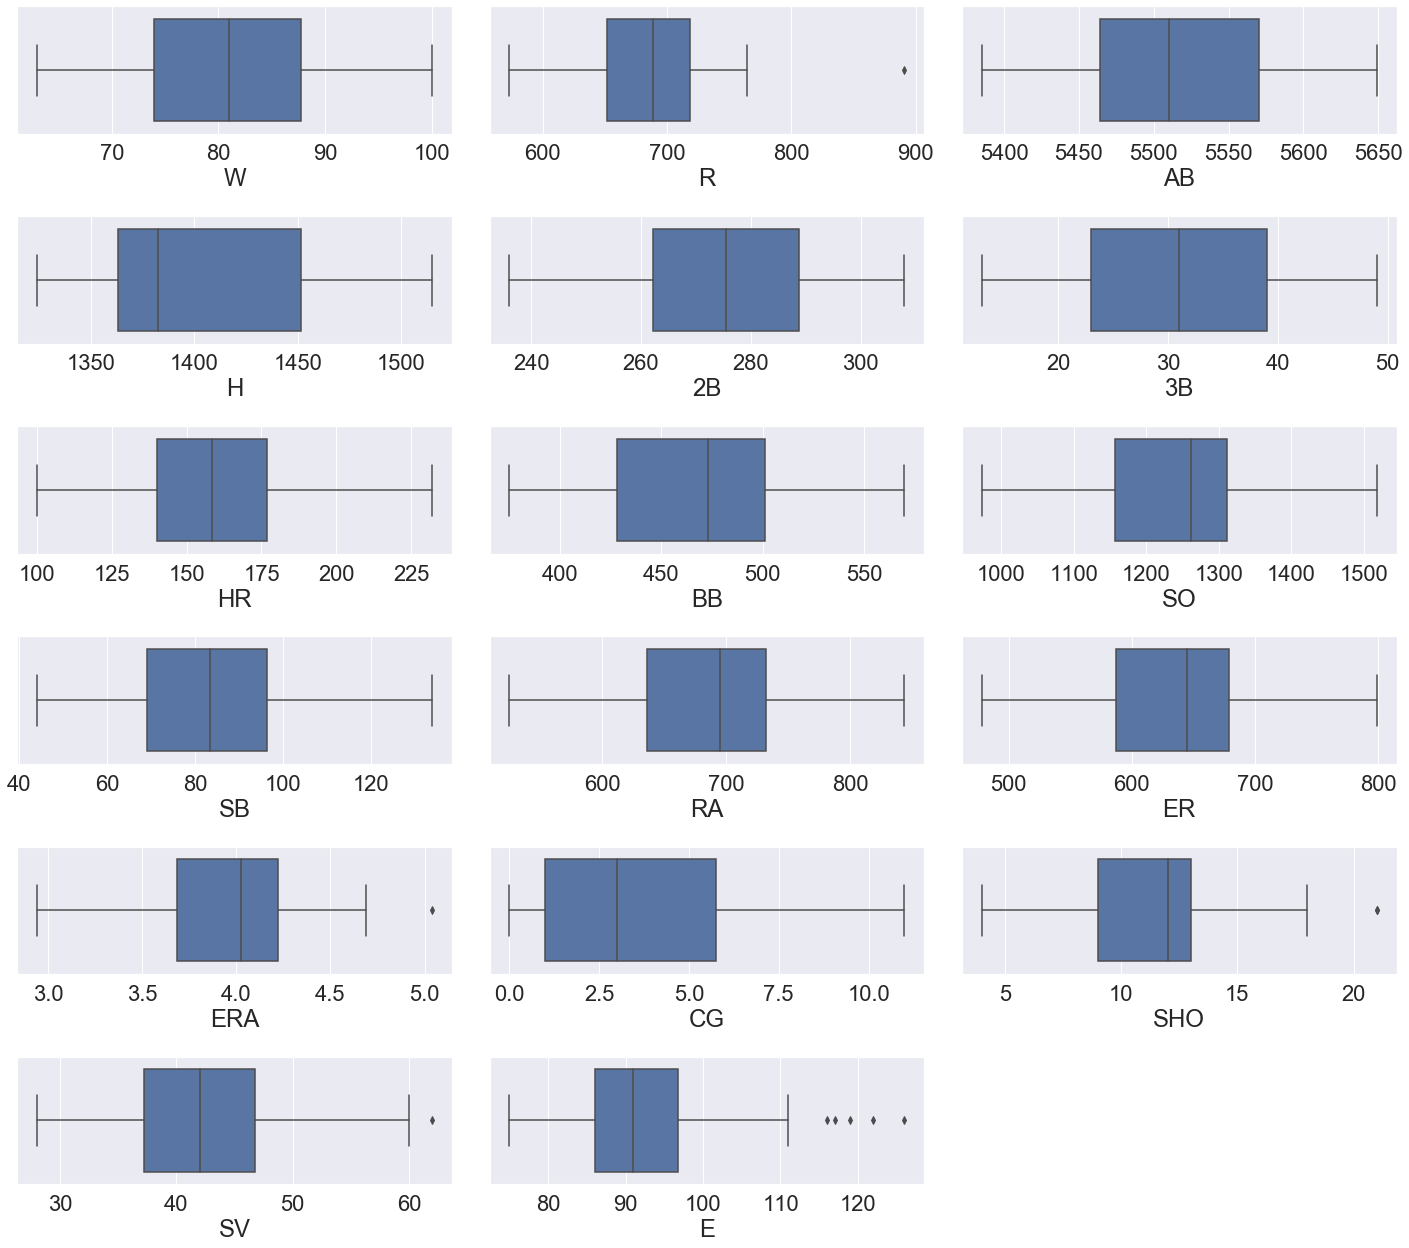

In [60]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(data[column])
    plotnumber+=1
plt.tight_layout()

**We can interpret that some features having outliers.**

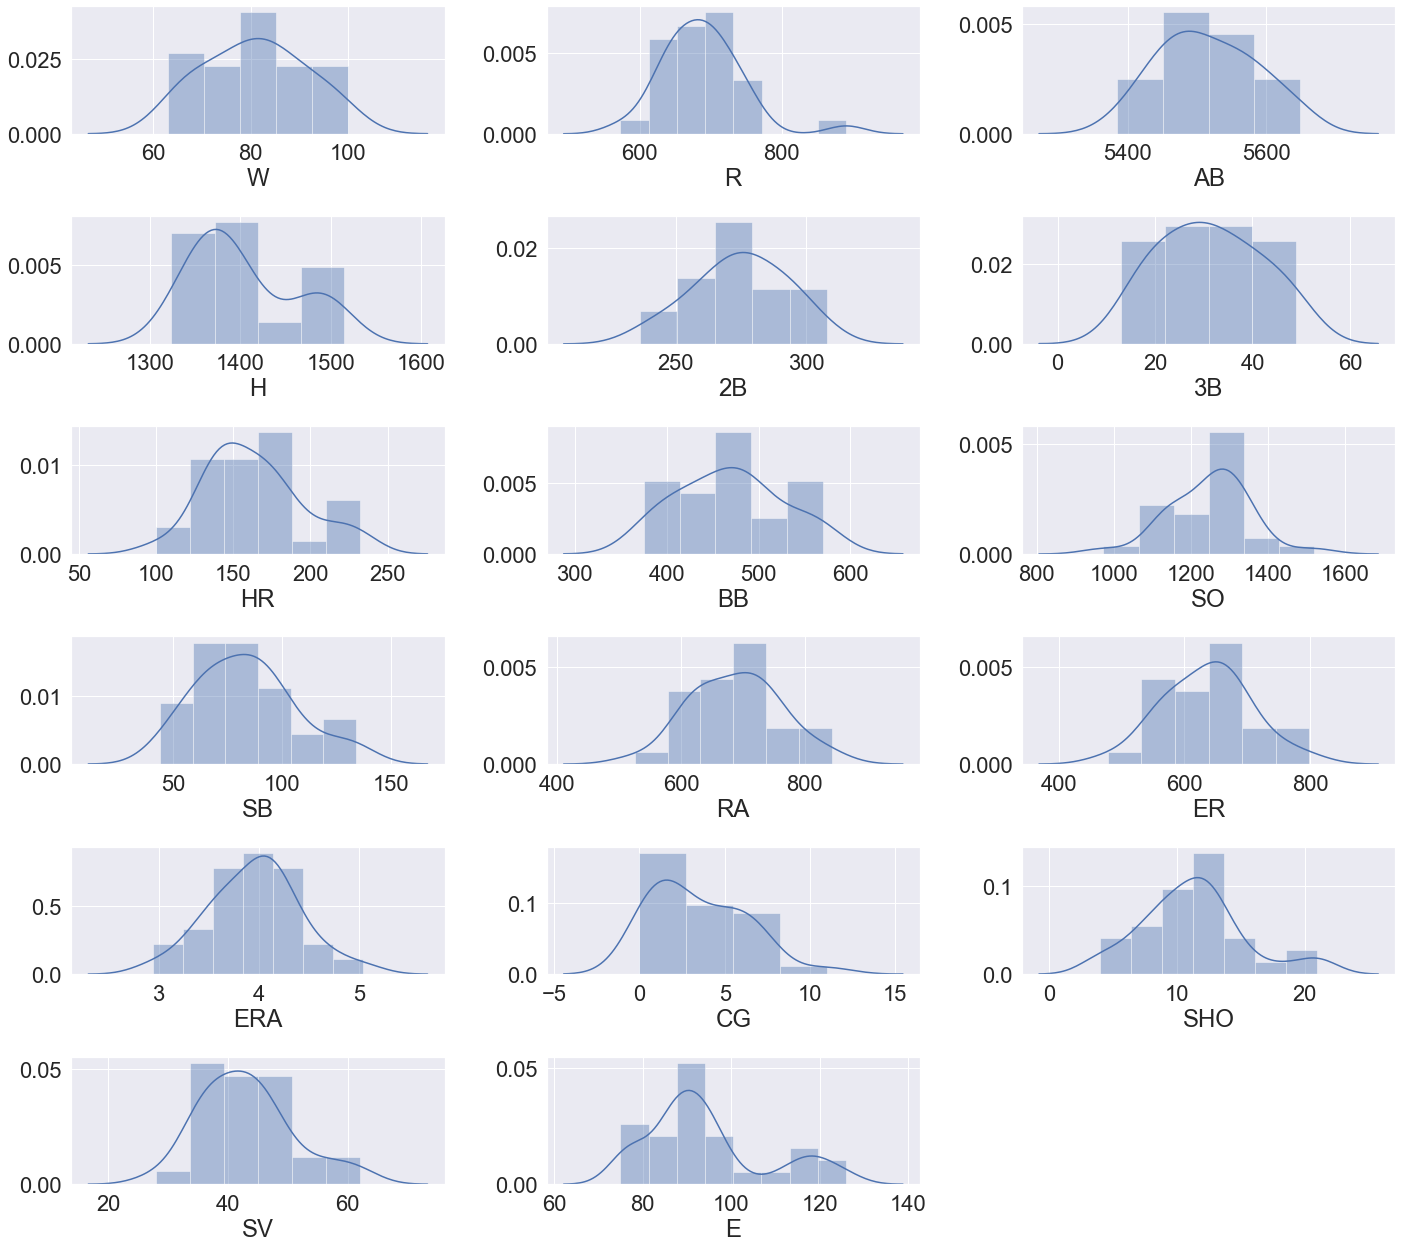

In [61]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**We can interpret the skewness of data.**

In [62]:
data.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

In [63]:
data.corr()["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [64]:
data.shape

(30, 17)

**As our dataset having only 30 observation and having 17 features we may need to drop features which are not having any impact on Wins,but will not drop now. here we can see SO,CG,H,AB,E featurs are having very less impact so we may need to drop these feature in future but first we will check our model score without dropping any features.**

# 8. Dealing with Outliers

**As we have seen that Outliers presence in R,ERA,SHO,SV and E features, so we will deal with these features.**

### Outliers dealing in R(Runs Scored) features.

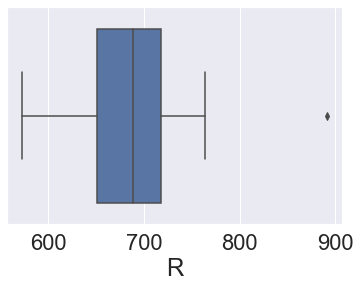

In [65]:
sns.boxplot(data["R"])

In [66]:
upper_limit=data["R"].mean()+3*data["R"].std()
lower_limit=data["R"].mean()-3*data["R"].std()

In [67]:
data['R'] = np.where(
    data['R']>upper_limit,
    upper_limit,
    np.where(
        data['R']<lower_limit,
        lower_limit,
        data['R']
    )
)

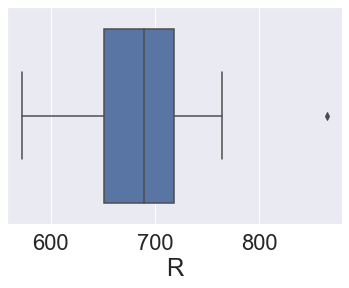

In [68]:
sns.boxplot(data["R"])

### Outliers dealing in ERA(Earned run average) features.

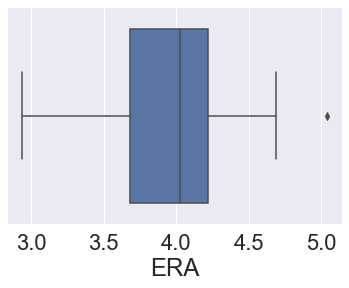

In [69]:
sns.boxplot(data["ERA"])

In [70]:
upper_limit=data["ERA"].mean()+3*data["ERA"].std()
lower_limit=data["ERA"].mean()-3*data["ERA"].std()

In [71]:
data['ERA'] = np.where(
    data['ERA']>upper_limit,
    upper_limit,
    np.where(
        data['ERA']<lower_limit,
        lower_limit,
        data['ERA']
    )
)

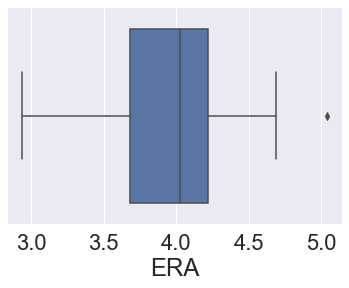

In [72]:
sns.boxplot(data["ERA"])

### Outliers dealing in SHO(Shutouts) features.

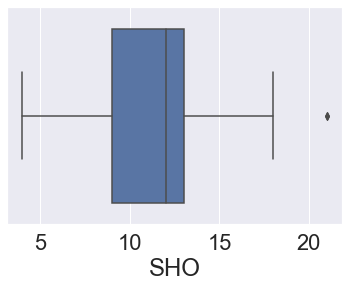

In [73]:
sns.boxplot(data["SHO"])

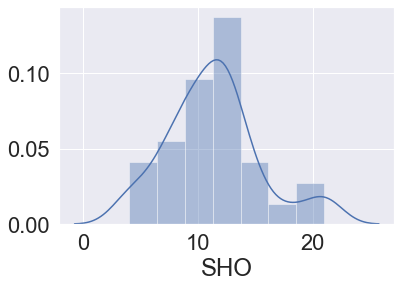

In [74]:
sns.distplot(data["SHO"])

In [75]:
upper_limit=data["SHO"].mean()+3*data["SHO"].std()
lower_limit=data["SHO"].mean()-3*data["SHO"].std()

In [76]:
data['SHO'] = np.where(
    data['SHO']>upper_limit,
    upper_limit,
    np.where(
        data['SHO']<lower_limit,
        lower_limit,
        data['SHO']
    )
)

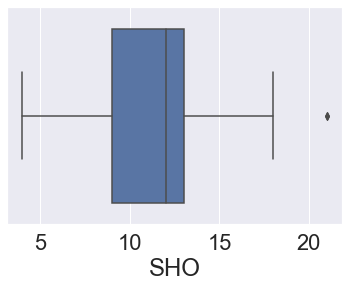

In [77]:
sns.boxplot(data["SHO"])

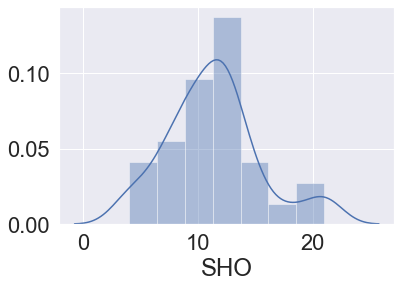

In [78]:
sns.distplot(data["SHO"])

### Outliers dealing in SV(Saves) features.

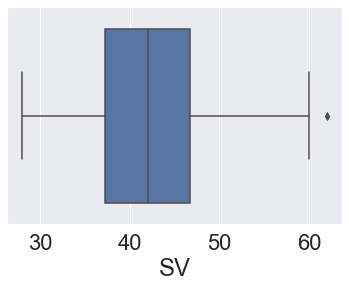

In [79]:
sns.boxplot(data["SV"])

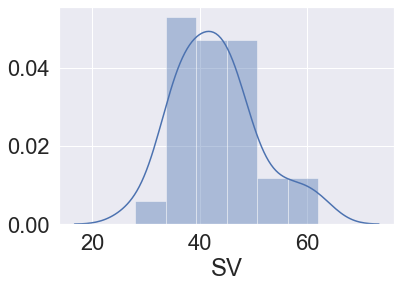

In [80]:
sns.distplot(data["SV"])

In [81]:
upper_limit=data["SV"].mean()+3*data["SV"].std()
lower_limit=data["SV"].mean()-3*data["SV"].std()

In [82]:
data['SV'] = np.where(
    data['SV']>upper_limit,
    upper_limit,
    np.where(
        data['SV']<lower_limit,
        lower_limit,
        data['SV']
    )
)

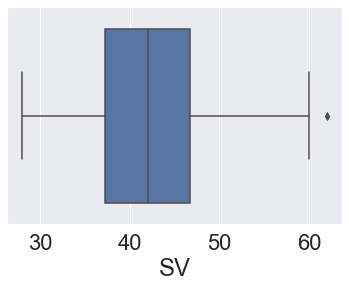

In [83]:
sns.boxplot(data["SV"])

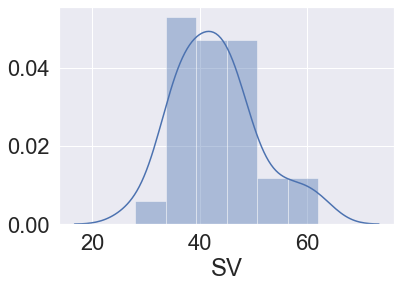

In [84]:
sns.distplot(data["SV"])

# 9 . Spliting train dataset

In [85]:
x=data.drop(columns="W",axis=1)

In [86]:
y=data.W

In [87]:
x.shape

(30, 16)

In [88]:
y.shape

(30,)

# 10. Scaler Transformation

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()

In [91]:
x_scaled=scaler.fit_transform(x)

In [92]:
x_scaled.shape

(30, 16)

# 11. Checking Multicollinearity with VIF

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
x=data.drop(columns="W",axis=1)

In [95]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [96]:
vif_data["VIF"] = [variance_inflation_factor(x_scaled, i)
                          for i in range(len(x.columns))]

In [97]:
print(vif_data)

   feature          VIF
0        R    11.096053
1       AB    13.049545
2        H     9.366089
3       2B     3.920473
4       3B     3.373549
5       HR     9.833221
6       BB     3.847947
7       SO     2.582430
8       SB     2.109230
9       RA   189.671923
10      ER  1710.731060
11     ERA  1245.823555
12      CG     2.981460
13     SHO     3.671718
14      SV     5.708497
15       E     2.158762


**As we can see there is multicollinearity problem with mentioned below features:**

    R
    AB
    H
    HR
    RA
    ER
    ERA
    SV

**We will not remove any features as of now we will check score and performance then will decide whether need to drop any feature or not.**

# 12. Model Building

## 12.1 Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

In [99]:
mlr=LinearRegression()

## 12.2 Choosing best Random state

In [100]:
for i in range(0,5000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    mlr.fit(x_train,y_train)
    pred_train=mlr.predict(x_train)
    pred_test=mlr.predict(x_test)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training R2_score is-",r2_score(y_train,pred_train)*100)
        print("Testing R2_score is-",r2_score(y_test,pred_test)*100)

At random state 2197 Model perfrom well
At random state 2197
Training R2_score is- 94.67057042592727
Testing R2_score is- 94.65938972421645
At random state 3941 Model perfrom well
At random state 3941
Training R2_score is- 94.68835004708502
Testing R2_score is- 94.71112684424634


**We can choose best random state 2197.**

In [101]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2197)

In [102]:
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 12.3 Evaluation Matrix

In [103]:
y_pred=mlr.predict(x_test)

In [104]:
pred_train=mlr.predict(x_train)

In [105]:
mlr_score=r2_score(y_test,y_pred)

In [106]:
mlr_score

0.9465938972421679

In [107]:
r2_score(y_train,pred_train)

0.946705704259273

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [109]:
MAE=mean_absolute_error(y_test,y_pred)

In [110]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [111]:
MAE

2.377461976419719

In [112]:
RMSE

2.5894850649920147

**As we can see here that Train score is 0.97 and test score is 0.40 hence model having issue of overfitting, so we can use below techinque to mitigate overfitting issue.**

1. Cross Validation
2. Regularization

## 12.4 Cross Validation

In [113]:
from sklearn.model_selection import cross_val_score,cross_validate

In [114]:
cross_val_score(mlr,x_scaled,y,cv=5)

array([ 0.7981863 , -2.06583664,  0.51930722,  0.7365936 ,  0.50037115])

In [115]:
cross_val_score(mlr,x_scaled,y,cv=5).mean()

0.09772432644850104

## 12.5 Choosing best cv for our model

In [116]:
r2_score(y_test,y_pred)

0.9465938972421679

In [117]:
for j in range(2,15):
    mlr_score=cross_val_score(mlr,x_scaled,y,cv=j)
    mlr_s=mlr_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",mlr_score*100)
    print("r2_Score:",mlr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [-162.92264557  -96.75167937]
r2_Score: -129.83716247264238


At CV:- 3
Cross validation score is: [-28.0432595   64.86856535 -48.38588547]
r2_Score: -3.853526540427269


At CV:- 4
Cross validation score is: [ 78.87871359 -88.40021467  67.46797874  48.30085462]
r2_Score: 26.561833070547326


At CV:- 5
Cross validation score is: [  79.81863039 -206.58366391   51.93072204   73.65935978   50.03711493]
r2_Score: 9.772432644850104


At CV:- 6
Cross validation score is: [ 70.13366145 -11.96194535 -55.17619096  78.69274597  56.55760957
   5.05382905]
r2_Score: 23.883284955498933


At CV:- 7
Cross validation score is: [ 70.13366145 -11.96194535  55.35298969  33.26548102  74.41134385
  89.15868991 -34.82285929]
r2_Score: 39.3624801840955


At CV:- 8
Cross validation score is: [ 94.33091494  73.89925243 -62.0877845   21.05953804  87.79158009
  72.45164021  87.76289192 -81.67691181]
r2_Score: 36.691390164647096


At CV:- 9
Cross validation score is: [   94.330

**we can choose CV 7.**

In [118]:
cross_val_score(mlr,x_scaled,y,cv=7)

array([ 0.70133661, -0.11961945,  0.5535299 ,  0.33265481,  0.74411344,
        0.8915869 , -0.34822859])

In [119]:
cross_val_score(mlr,x_scaled,y,cv=7).mean()

0.39362480184095505

In [120]:
mlr_cv_score=cross_val_score(mlr,x_scaled,y,cv=7).mean()

In [121]:
mlr_cv_score

0.39362480184095505

In [122]:
mlr_score=r2_score(y_test,y_pred)

In [123]:
mlr_score

0.9465938972421679

**As we can see model score is not so great, so we will check with other model.**

# 13 Ridge Regression

In [124]:
from sklearn.linear_model import Ridge

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=2197)

In [126]:
ridge_model=Ridge(alpha=10)

In [127]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

## 13.1 Evaluation Matrix

In [128]:
ridge_test_pred=ridge_model.predict(x_test)

In [129]:
ridge_train_pred=ridge_model.predict(x_train)

In [130]:
ridge_model_score=r2_score(y_test,ridge_test_pred)

In [131]:
ridge_model_score

0.8001538185438206

In [132]:
r2_score(y_train,ridge_train_pred)

0.8773397976474111

In [133]:
MAE=mean_absolute_error(y_test,y_pred)

In [134]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [135]:
MAE

2.377461976419719

In [136]:
RMSE

2.5894850649920147

**In Ridge regression model, we can see our model score has increased from 0.40 to 0.83.**

## 13.2 find best Cross Validation score for model.

In [137]:
for j in range(2,15):
    ridge_model_score=cross_val_score(ridge_model,x_scaled,y,cv=j)
    ridge_model_s=ridge_model_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",ridge_model_score*100)
    print("r2_Score:",ridge_model_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [24.63881648 23.07310951]
r2_Score: 23.855962994268946


At CV:- 3
Cross validation score is: [47.05617132 64.06035736 94.13115881]
r2_Score: 68.41589583112717


At CV:- 4
Cross validation score is: [57.63635256 63.64507774 76.21033493 95.9534681 ]
r2_Score: 73.3613083311208


At CV:- 5
Cross validation score is: [ 61.60144534 -79.15969742  58.74464156  62.63633453  96.15092548]
r2_Score: 39.9947298991671


At CV:- 6
Cross validation score is: [51.82153511 19.47596151 32.29586139 68.55678457 92.47642988 93.95436306]
r2_Score: 59.76348925503986


At CV:- 7
Cross validation score is: [ 51.82153511  19.47596151 -34.44635688  47.80898003  76.69066494
  96.82721575  86.55047315]
r2_Score: 49.24692480073165


At CV:- 8
Cross validation score is: [  41.32719106   84.73829579 -107.57843406   70.06105988   74.50277449
   90.41958884   97.75611079   87.97283226]
r2_Score: 54.899927381098536


At CV:- 9
Cross validation score is: [   41.32719106    84.73829579

**we can see best score with CV 4.**

In [138]:
cross_val_score(ridge_model,x_scaled,y,cv=4)

array([0.57636353, 0.63645078, 0.76210335, 0.95953468])

In [139]:
ridge_model_cv_score=cross_val_score(ridge_model,x_scaled,y,cv=4).mean()

In [140]:
ridge_model_cv_score

0.7336130833112079

In [141]:
ridge_model_score=r2_score(y_test,ridge_test_pred)

# 14 Elastic Net

In [142]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2197)

In [143]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [144]:
elastic_model=ElasticNet()

In [145]:
elastic_model.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4575347677555328, tolerance: 0.2411958333333333
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

## 14.1 Evaluation Matrix

In [146]:
test_predictions=elastic_model.predict(x_test)

In [147]:
train_prediction=elastic_model.predict(x_train)

In [148]:
elastic_score=r2_score(y_test,test_predictions)

In [149]:
r2_score(y_train,train_prediction)

0.932309628075087

In [150]:
MAE=mean_absolute_error(y_test,test_predictions)

In [151]:
RMSE=np.sqrt(mean_squared_error(y_test,test_predictions))

In [152]:
MAE

2.20141094829593

In [153]:
RMSE

2.800247359665762

## 14.2 find best CV for model

In [154]:
for j in range(2,15):
    elastic_model_score=cross_val_score(elastic_model,x_scaled,y,cv=j)
    elastic_model_s=elastic_model_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",elastic_model_score*100)
    print("r2_Score:",elastic_model_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [21.0904948 25.3079761]
r2_Score: 23.19923544518566


At CV:- 3
Cross validation score is: [41.87606489 63.26991777 90.66662207]
r2_Score: 65.2708682412155


At CV:- 4
Cross validation score is: [52.52346987 68.02528635 74.1607606  89.38713601]
r2_Score: 71.02416320919959


At CV:- 5
Cross validation score is: [ 59.97922901 -61.64315768  55.61906828  51.64299727  91.71595956]
r2_Score: 39.46281928748759


At CV:- 6
Cross validation score is: [57.27456994  8.40367175 42.2450735  65.38424323 87.13055652 92.30603882]
r2_Score: 58.79069229350248


At CV:- 7
Cross validation score is: [ 57.27456994   8.40367175 -13.61271435  44.59658911  68.56587347
  86.71262811  89.91405853]
r2_Score: 48.836382365491495


At CV:- 8
Cross validation score is: [ 46.8846263   66.04438954 -84.83922263  76.19244219  72.46685402
  88.05276736  93.4909052   82.06591512]
r2_Score: 55.04483463562638


At CV:- 9
Cross validation score is: [   46.8846263     66.04438954   -84.839

**best CV we can choose 4.**

In [155]:
cross_val_score(elastic_model,x_scaled,y,cv=4)

array([0.5252347 , 0.68025286, 0.74160761, 0.89387136])

In [156]:
elastic_cv_score=cross_val_score(elastic_model,x_scaled,y,cv=4).mean()

In [157]:
elastic_cv_score

0.7102416320919959

In [158]:
elastic_score=r2_score(y_test,test_predictions)

In [159]:
elastic_score

0.9375464889576676

# 15 Random forest Regressor

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=2197)

In [162]:
rfr=RandomForestRegressor()

In [163]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## 15.1 Evaluation Matrix

In [164]:
y_pred=rfr.predict(x_test)

In [165]:
train_pred=rfr.predict(x_train)

In [166]:
rfr_score=r2_score(y_test,y_pred)

In [167]:
r2_score(y_train,train_pred)

0.9436008913918495

## 15.2 Choosing best cv

In [168]:
for j in range(2,15):
    rfr_score=cross_val_score(rfr,x_scaled,y,cv=j)
    rfr_s=rfr_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rfr_score*100)
    print("r2_Score:",rfr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [-90.72753101   8.76131544]
r2_Score: -40.98310778586516


At CV:- 3
Cross validation score is: [10.90627896 48.72643657 62.80957012]
r2_Score: 40.81409521580372


At CV:- 4
Cross validation score is: [10.99301144 28.92213765 61.16200964 68.69459813]
r2_Score: 42.442939213703134


At CV:- 5
Cross validation score is: [  29.06979574 -525.16003817   23.43070069   32.59428571   78.86285207]
r2_Score: -72.24048079201432


At CV:- 6
Cross validation score is: [  28.68615214 -100.86624668   26.02390537   42.59796402   61.90477769
   70.36264741]
r2_Score: 21.451533322767204


At CV:- 7
Cross validation score is: [  40.01469719  -93.11704244 -144.83327434    8.39114789   66.42327996
   57.01226161   57.81989343]
r2_Score: -1.1841480995280278


At CV:- 8
Cross validation score is: [   8.67029525   13.89574843 -623.18308824   50.21269588   70.9282638
   50.22113653   88.14549777   30.03208791]
r2_Score: -38.88467033217387


At CV:- 9
Cross validation score i

**we can choose cv-3**

In [169]:
cross_val_score(rfr,x_scaled,y,cv=4)

array([-0.09259695,  0.34755165,  0.64231898,  0.70411541])

In [170]:
rfr_cv_score=cross_val_score(rfr,x_scaled,y,cv=4).mean()

In [171]:
rfr_cv_score

0.4027151465684913

In [172]:
rfr_score=r2_score(y_test,y_pred)

In [173]:
rfr_score

0.6119357964601768

# 16 KNN Regressor

In [174]:
from sklearn.neighbors import KNeighborsRegressor

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2197)

In [176]:
knn=KNeighborsRegressor()

In [177]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

## 16.1 Evaluation Matrix

In [178]:
y_pred=knn.predict(x_test)

In [179]:
knn_score=r2_score(y_test,y_pred)

In [180]:
MAE=mean_absolute_error(y_test,y_pred)

In [181]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [182]:
MAE

6.8

In [183]:
RMSE

8.095266106394114

## 16.2 Choosing best cross validation

In [184]:
for j in range(2,15):
    knn_score=cross_val_score(knn,x_scaled,y,cv=j)
    knn_s=knn_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",knn_score*100)
    print("r2_Score:",knn_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [-44.11163809  21.67490146]
r2_Score: -11.218368314116178


At CV:- 3
Cross validation score is: [28.62835959 48.71890547 56.69797768]
r2_Score: 44.68174758064774


At CV:- 4
Cross validation score is: [27.92884371 45.18162098 61.62313253 47.69271758]
r2_Score: 45.60657870170923


At CV:- 5
Cross validation score is: [  31.64476021 -246.21374046   32.26808835   36.98210361   56.61538462]
r2_Score: -17.740680734303112


At CV:- 6
Cross validation score is: [32.57016248 30.29177719  9.97175141 47.44633838 66.3650546  82.40566038]
r2_Score: 44.8417907409459


At CV:- 7
Cross validation score is: [  32.57016248   30.29177719 -161.89970501   27.72652033   50.7807841
   65.75536695   67.85790409]
r2_Score: 16.15468715974101


At CV:- 8
Cross validation score is: [   7.24518614   42.31949686 -133.           63.11996459   56.39270547
   63.54833948   85.71768202   31.75824176]
r2_Score: 27.137702038856727


At CV:- 9
Cross validation score is: [ 7.24518614e

**best CV we can choose 4.**

In [185]:
cross_val_score(rfr,x_scaled,y,cv=4)

array([-0.08397789,  0.33029809,  0.65014143,  0.63322564])

In [186]:
knn_cv_score=cross_val_score(rfr,x_scaled,y,cv=4).mean()

In [187]:
knn_cv_score

0.38250624252721266

In [188]:
knn_score=r2_score(y_test,y_pred)

In [189]:
knn_score

0.478053097345133

# 17. Choosing Best Model

In [190]:
Multiplelinear_Regression={"R2 Score":np.round(mlr_score,2),
                    "CV Score":np.round(mlr_cv_score,2),
                    "Difference":mlr_score-mlr_cv_score}
Ridge_Regression={"R2 Score":np.round(ridge_model_score,2),
                    "CV Score":np.round(ridge_model_cv_score,2),
                    "Difference":ridge_model_score-ridge_model_cv_score}
Elastic_Net={"R2 Score":np.round(elastic_score,2),
                    "CV Score":np.round(elastic_cv_score,2),
                    "Difference":elastic_score-elastic_cv_score}
Random_Forest={"R2 Score":np.round(rfr_score,2),
                    "CV Score":np.round(rfr_cv_score,2),
                    "Difference":rfr_score-rfr_cv_score}
Knn_Regressor={"R2 Score":np.round(knn_score,2),
                    "CV Score":np.round(knn_cv_score,2),
                    "Difference":knn_score-knn_cv_score}


In [191]:
data=np.array([[mlr_score,mlr_cv_score,mlr_score-mlr_cv_score],[ridge_model_score,ridge_model_cv_score,ridge_model_score-ridge_model_cv_score],[elastic_score,elastic_cv_score,elastic_score-elastic_cv_score],[rfr_score,rfr_cv_score,rfr_score-rfr_cv_score],[knn_score,knn_cv_score,knn_score-knn_cv_score]])

In [192]:
index_value=["MultiLinear Regression","Ridge Regression","Elastic Net Regression","RandomForest Regression","Knn Regression"]

In [193]:
columns_value=["r2 Score","Cross Validation Score","Difference"]

In [194]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [195]:
model_selection

r2 Score  Cross Validation Score  Difference
MultiLinear Regression   0.946594                0.393625    0.552969
Ridge Regression         0.800154                0.733613    0.066541
Elastic Net Regression   0.937546                0.710242    0.227305
RandomForest Regression  0.611936                0.402715    0.209221
Knn Regression           0.478053                0.382506    0.095547

**As we can see the r2 score and cross validation score difference is less for ridge regression model with good r2 score. so we will choose Ridge regression model for this dataset.**

# 18 Hyperparameter tuning with Ridge Regression

In [196]:
from sklearn.linear_model import RidgeCV

In [197]:
ridge_cv_model=RidgeCV(alphas=(0.1,1.0,10.0),scoring="neg_mean_absolute_error")

In [198]:
ridge_cv_model.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring='neg_mean_absolute_error',
        store_cv_values=False)

In [199]:
ridge_cv_model.alpha_

10.0

In [200]:
test_predictions=ridge_cv_model.predict(x_test)

In [201]:
r2_score(y_test,test_predictions)

0.9432131595603842

**As we can see with hyperparameter tuning the model accuracy has increased from 0.80 to 0.94.**

# 19 Saving the model

In [202]:
import pickle

In [203]:
filename="baseball_predict.pkl"

In [204]:
pickle.dump(ridge_cv_model,open(filename,"wb"))